In [ ]:
import sys
sys.path.append('assets_datasets/')
sys.path.append('assets_psychophysics/')
import stimuli_generate_FrequencyShiftedComplexes
import h5py
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

import util_stimuli

fn = '/om/user/msaddler/data_pitchnet/mooremoore2003/MooreMoore2003_frequencyShiftedComplexes_f0_080to500Hz/cf100_species002_spont070/bez2018meanrates.hdf5'
f= h5py.File(fn, 'r')
for v in list(f.values()): print(v)
    

np.unique(f['spectral_envelope_bandwidth_in_harmonics'][:])


idx = np.random.randint(f['f0'].shape[0])

y = f['signal'][idx]
print(f['spectral_envelope_bandwidth_in_harmonics'][idx],
      f['spectral_envelope_centered_harmonic'][idx],
      f['f0'][idx],
      f['spectral_envelope_f_center'][idx],
      f['spectral_envelope_f_bandwidth'][idx],
      f['f0_shift'][idx])

plt.figure()
fxx, pxx = util_stimuli.power_spectrum(y, f['signal_fs'][0])
plt.plot(fxx, pxx)
plt.show()

import IPython.display as ipd
ipd.display(ipd.Audio(y, rate=f['signal_fs'][0]))

f.close()

In [ ]:
import numpy as np
import h5py
%matplotlib inline
import matplotlib.pyplot as plt
import IPython.display as ipd
import glob

import sys
sys.path.append('assets_datasets/')
sys.path.append('assets_psychophysics/')
from util_stimuli import complex_tone, modified_uniform_masking_noise, power_spectrum
import stimuli_f0_labels
import f0dl_bernox

# fn = '/om2/user/msaddler/pitchnet/saved_models/test_ibm1/EVAL_bernox2005_HighSpec.json'
# fn = '/om2/user/msaddler/pitchnet/saved_models/test_ibm1/EVAL_bernox2005legacy.json'

fn_list = [
#     '/om2/user/msaddler/pitchnet/saved_models/test_ibm0/EVAL.json',
#     '/om2/user/msaddler/pitchnet/saved_models/test_ibm0/EVAL_bernox2005_LowSpec.json',
#     '/om2/user/msaddler/pitchnet/saved_models/test_ibm1/EVAL_bernox2005_LowSpec.json',
#     '/om2/user/msaddler/pitchnet/saved_models/test_ibm2/EVAL_bernox2005_LowSpec.json',
#     '/om2/user/msaddler/pitchnet/saved_models/test_regression/EVAL.json',
#     '/om2/user/msaddler/pitchnet/saved_models/test_regression/EVAL_bernox2005_HighSpec.json',
#     '/om2/user/msaddler/pitchnet/saved_models/test_regression/EVAL_bernox2005_LowSpec.json',
#     '/om2/user/msaddler/pitchnet/saved_models/bernox2005like_SyntheticBandpassJWSS_model0_sigmoid_regression/EVAL.json',
#     '/om2/user/msaddler/pitchnet/saved_models/PND_v00_JWSS_test_classification_and_l2regression/EVAL_bernox2005_LowSpec_bestckpt.json',
    '/om2/user/msaddler/pitchnet/saved_models/arch001seed517_PND_v00_JWSS_classification/EVAL_bernox2005_LowSpec_bestckpt.json'
]

# json_regex = '/om2/user/msaddler/pitchnet/saved_models/PND_v0*_JWSS_*/EVAL_bernox2005_LowSpec_bestckpt.json'
# json_regex = '/om2/user/msaddler/pitchnet/saved_models/arch001seed*_PND_v00_JWSS_classification/EVAL_bernox2005_*_bestckpt.json'
# json_regex = '/om2/user/msaddler/pitchnet/saved_models/PND_v0*_JWSS_*/EVAL_VALID_CLEAN_bestckpt.json'
json_regex = '/om2/user/msaddler/pitchnet/saved_models/PND_v01_JWSS_highSNR_*/EVAL_bernox2005_*Spec_bestckpt.json'
json_regex = '/om2/user/msaddler/pitchnet/saved_models/PND_v01_JWSS_highSNR_*/EVAL_VALID_bestckpt.json'
json_regex = '/om2/user/msaddler/pitchnet/saved_models/PND_v0*_JWSS_classification*/EVAL_bernox2005_LowSpec_bestckpt.json'
json_regex = '/om2/user/msaddler/pitchnet/saved_models/PND_v00_JWSS_classification0/EVAL_bernox2005_*_bestckpt.json'
json_regex = '/om2/user/msaddler/pitchnet/saved_models/PND_v00_JWSS_classificationl2regression*/EVAL_bernox2005_LowSpec_bestckpt.json'
json_regex = '/om2/user/msaddler/pitchnet/saved_models/PND_v00_JWSS_classification*/EVAL_bernox2005_MovingFilter_bestckpt.json'


fn_list = sorted(glob.glob(json_regex))

model_name_list = []
for json_fn in fn_list:
    model_name = json_fn.replace('/om2/user/msaddler/pitchnet/saved_models/', '')
    model_name = model_name[:model_name.rfind('/')]
#     model_name = model_name[model_name.rfind('/'):]
#     model_name = model_name.replace('_bestckpt.json', '')
    model_name_list.append(model_name)

NCOLS = 3
NROWS = int(np.ceil(len(fn_list) / NCOLS))
fig, ax = plt.subplots(nrows=NROWS, ncols=NCOLS, figsize=(4*NCOLS, 4*NROWS))
ax = ax.flatten()

for idx, fn in enumerate(fn_list):

    if False:#'log2' in fn:
        f0_label_pred_key = 'f0_log2:labels_pred'
        f0_label_true_key = 'f0_log2:labels_true'
    else:
        f0_label_pred_key = 'f0_label:labels_pred'
        f0_label_true_key = 'f0_label:labels_true'
    expt_dict = f0dl_bernox.load_f0_expt_dict_from_json(fn, metadata_key_list=[],
                                                        f0_label_true_key=f0_label_true_key,
                                                        f0_label_pred_key=f0_label_pred_key)
    expt_dict = f0dl_bernox.add_f0_estimates_to_expt_dict(expt_dict,
                                                          f0_label_true_key=f0_label_true_key,
                                                          f0_label_pred_key=f0_label_pred_key)
    
#     ax[idx].plot(expt_dict['f0'], 5*expt_dict['f0'], 'r--', markersize=0.3)
#     ax[idx].plot(expt_dict['f0'], 4*expt_dict['f0'], 'r--', markersize=0.3)
#     ax[idx].plot(expt_dict['f0'], 3*expt_dict['f0'], 'r--', markersize=0.3)
#     ax[idx].plot(expt_dict['f0'], 2*expt_dict['f0'], 'r--', markersize=0.3)

    ax[idx].plot(expt_dict['f0'], expt_dict['f0_pred'], 'k.', markersize=0.3)
    ax[idx].set_xlabel('f0_true (Hz)')
    ax[idx].set_ylabel('f0_pred (Hz)')
    ax[idx].set_title(model_name_list[idx])
    ax[idx].set_yscale('log')
    ax[idx].set_xscale('log')

for idx in range(len(fn_list), len(ax)): ax[idx].axis('off')
plt.tight_layout()
plt.show()

# fig.savefig('assets_psychophysics/confusion_matrices_PNDv01_highSNR_validation.pdf', bbox_inches='tight')

In [ ]:
import numpy as np
import h5py
%matplotlib inline
import matplotlib.pyplot as plt
import IPython.display as ipd
import glob

import sys
sys.path.append('assets_datasets/')
sys.path.append('assets_psychophysics/')
from util_stimuli import complex_tone, modified_uniform_masking_noise, power_spectrum
import stimuli_f0_labels
import f0dl_bernox

# fn = '/om2/user/msaddler/pitchnet/saved_models/test_ibm1/EVAL_bernox2005_HighSpec.json'
# fn = '/om2/user/msaddler/pitchnet/saved_models/test_ibm1/EVAL_bernox2005legacy.json'

fn_list = [
#     '/om2/user/msaddler/pitchnet/saved_models/test_ibm0/EVAL.json',
#     '/om2/user/msaddler/pitchnet/saved_models/test_ibm0/EVAL_bernox2005_LowSpec.json',
#     '/om2/user/msaddler/pitchnet/saved_models/test_ibm1/EVAL_bernox2005_LowSpec.json',
#     '/om2/user/msaddler/pitchnet/saved_models/test_ibm2/EVAL_bernox2005_LowSpec.json',
#     '/om2/user/msaddler/pitchnet/saved_models/test_regression/EVAL.json',
#     '/om2/user/msaddler/pitchnet/saved_models/test_regression/EVAL_bernox2005_HighSpec.json',
#     '/om2/user/msaddler/pitchnet/saved_models/test_regression/EVAL_bernox2005_LowSpec.json',
#     '/om2/user/msaddler/pitchnet/saved_models/bernox2005like_SyntheticBandpassJWSS_model0_sigmoid_regression/EVAL.json',
#     '/om2/user/msaddler/pitchnet/saved_models/PND_v00_JWSS_test_classification_and_l2regression/EVAL_bernox2005_LowSpec_bestckpt.json',
    '/om2/user/msaddler/pitchnet/saved_models/arch001seed517_PND_v00_JWSS_classification/EVAL_bernox2005_LowSpec_bestckpt.json'
]

# json_regex = '/om2/user/msaddler/pitchnet/saved_models/PND_v0*_JWSS_*/EVAL_bernox2005_LowSpec_bestckpt.json'
# json_regex = '/om2/user/msaddler/pitchnet/saved_models/arch001seed*_PND_v00_JWSS_classification/EVAL_bernox2005_*_bestckpt.json'
json_regex = '/om2/user/msaddler/pitchnet/saved_models/PND_v0*_JWSS_*/EVAL_VALID_CLEAN_bestckpt.json'
json_regex = '/om2/user/msaddler/pitchnet/saved_models/PND_v01_JWSS_highSNR_*/EVAL_VALID_bestckpt.json'
json_regex = '/om2/user/msaddler/pitchnet/saved_models/PND_v0*_JWSS_classification*/EVAL_bernox2005_LowSpec_bestckpt.json'

fn_list = sorted(glob.glob(json_regex))

model_name_list = []
for json_fn in fn_list:
    model_name = json_fn.replace('/om2/user/msaddler/pitchnet/saved_models/', '')
    model_name = model_name[:model_name.rfind('/')]
    model_name_list.append(model_name)

NCOLS = 2
NROWS = int(np.ceil(len(fn_list) / NCOLS))
fig, ax = plt.subplots(nrows=NROWS, ncols=NCOLS, figsize=(4*NCOLS, 4*NROWS))
ax = ax.flatten()

for idx, fn in enumerate(fn_list):

    if 'regress' in fn:
        f0_label_pred_key = 'f0_lognormal:labels_pred'
        f0_label_true_key = 'f0_lognormal:labels_true'
    else:
        f0_label_pred_key = 'f0_label:labels_pred'
        f0_label_true_key = 'f0_label:labels_true'
    expt_dict = f0dl_bernox.load_f0_expt_dict_from_json(fn, metadata_key_list=[],
                                                        f0_label_true_key=f0_label_true_key,
                                                        f0_label_pred_key=f0_label_pred_key)
    expt_dict = f0dl_bernox.add_f0_estimates_to_expt_dict(expt_dict,
                                                          f0_label_true_key=f0_label_true_key,
                                                          f0_label_pred_key=f0_label_pred_key)
    f0 = expt_dict['f0']
    f0_pred = expt_dict['f0_pred']
    
    f0_percent_error = 100 * (f0_pred - f0) / f0
    
#     ax[idx].plot(f0, f0_percent_error, 'k.', markersize=0.3)
    
    ax[idx].hist(f0_percent_error, 500, color='k')

    ax[idx].set_xlabel('f0 percent error')
    ax[idx].set_ylabel('count')
    ax[idx].set_title(model_name_list[idx])
    ax[idx].set_yscale('log')

for idx in range(len(fn_list), len(ax)): ax[idx].axis('off')
plt.tight_layout()
plt.show()

# fig.savefig('assets_psychophysics/percent_error_histograms_PNDv01_highSNR_validation.pdf', bbox_inches='tight')

In [ ]:
# fl = 2.5e3
# fh = 3.5e3
fl = 5e3
fh = 7e3
fs = 32e3
frequency_response_in_dB = get_bandpass_filter_frequency_response(fl, fh, fs=fs, order=4)

f0 = 150
dur = 0.05
signal, harms = bernox2005_bandpass_complex_tone(f0, fs, dur,
                                                 frequency_response_in_dB=frequency_response_in_dB,
                                                 phase_mode='sine')
noise = modified_uniform_masking_noise(fs, dur, dBHzSPL=15., attenuation_start=600., attenuation_slope=2)
y = signal + noise

print(harms)

fxx, pxx  = power_spectrum(y, fs)
plt.figure()
plt.plot(fxx/f0, pxx)
plt.plot(fxx/f0, 33.3*np.ones_like(fxx))
plt.plot(harms, 33.3*np.ones_like(harms), 'o')
plt.ylim([0, None])
plt.show()

ipd.display(ipd.Audio(y, rate=fs))

plt.figure()
plt.plot(y)
plt.show()



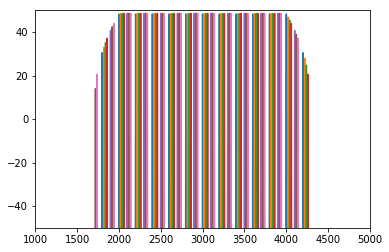

In [1]:
import h5py
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import sys
sys.path.append('assets_datasets/')
sys.path.append('assets_psychophysics/')
import util_stimuli
import pdb

# For the INT and UNRES conditions, the flat region of the spectral envelope covered
# a frequency range equal to 5F0. The amplitude of the spectral envelope at a given
# frequency F within the sloping region was determined by a frequency variable x, 
# defined as 1 - |(F-Fe)/1.5F0| , where Fe is the frequency at the edge of the flat region


def get_MooreMoore2003_spectral_envelope(f0, f_center, f_bandwidth):
    '''
    Returns a function to compute spectral envelope of Moore & Moore (2003)
    frequency-shifted complexes (see left column of page 979).
    
    Args
    ----
    f0 (float): fundamental frequency used to set sloping regions (Hz)
    f_center (float): center frequency of the bandpass filter (Hz)
    f_bandwidth (float): bandwidth of the flat region (Hz)
    
    Returns
    -------
    spectral_envelope (function): returns amplitude envelope as a function of frequency (in Hz)
    '''
    
    f_high_edge = f_center + f_bandwidth/2
    f_low_edge = f_center - f_bandwidth/2
    
    def sloping_region(f, f_edge, f0):
        x = 1. - np.abs((f - f_edge) / (1.5 * f0))
        x[x < 0] = 0
        return (np.power(10, x) - 1) / 9
    
    def spectral_envelope(f):
        envelope = np.ones_like(f).astype(np.float32)
        envelope[f <= f_low_edge] = sloping_region(f[f <= f_low_edge], f_low_edge, f0)
        envelope[f >= f_high_edge] = sloping_region(f[f >= f_high_edge], f_high_edge, f0)
        envelope[envelope < 0] = 0
        return envelope
    
    return spectral_envelope


def get_MooreMoore2003_complex_tone(f0, f0_shift=0.0, spectral_envelope=None,
                                    fs=32000, dur=0.150, dBSPL=70.0, phase_mode='cos'):
    '''
    Returns a frequency-shifted complex with the specified spectral envelope.
    
    Args
    ----
    f0 (float): fundamental frequency of complex tone before frequency-shifting (Hz)
    f0_shift (float): frequency shift applied to all components (fraction of f0)
    spectral_envelope (function): returns amplitude envelope as a function of frequency (in Hz)
    fs (int): sampling rate (Hz)
    dur (float): duration (s)
    dBSPL (float): overall sound presentation level in dB re 20e-6 Pa
    phase_mode (str): specify starting phase of each component
    
    Returns
    -------
    y (np array): frequency-shifted complex tone (units Pa)
    '''
    assert spectral_envelope is not None, "`spectral_envelope` is a required argument"
    frequencies = np.arange(f0, fs/2, f0, dtype=np.float32)
    frequencies = frequencies + f0*f0_shift
    amplitudes = spectral_envelope(frequencies)
    y = util_stimuli.complex_tone(f0, fs, dur, harmonic_numbers=None,
                                  frequencies=frequencies, amplitudes=amplitudes,
                                  phase_mode=phase_mode, offset_start=True, strict_nyquist=False)
    y = util_stimuli.set_dBSPL(y, dBSPL)
    return y


fs = 32000
f0 = 200
dur = 0.5
dBSPL = 70.0
f_center = f0*15
f_bandwidth = 10*f0
spectral_envelope = get_MooreMoore2003_spectral_envelope(f0, f_center, f_bandwidth)

plt.figure()
for f0_shift in [0, 0.1, 0.2, 0.3, 0.5, 0.6, 0.7]:
    y = get_MooreMoore2003_complex_tone(f0, f0_shift=f0_shift, spectral_envelope=spectral_envelope)
    fxx, pxx = util_stimuli.power_spectrum(y, fs)
    plt.plot(fxx, pxx)
    
plt.ylim([-50, 50])
plt.xlim([f_center-f_bandwidth, f_center+f_bandwidth])
plt.show()

In [ ]:
import sys
import os
import h5py
import glob
import numpy as np

% matplotlib inline
import matplotlib.pyplot as plt

def get_f0_bins(f0_min=80, f0_max=1e3, binwidth_in_octaves=1/192):
    '''
    Get f0 bins for digitizing f0 values to log-spaced bins.
    
    Args
    ----
    f0_min (float): minimum f0 value, sets reference value for bins
    f0_max (float): maximum f0 value, determines number of bins
    binwidth_in_octaves (float): octaves above f0_min (1/192 = 1/16 semitone bins)
    
    Returns
    -------
    bins (np array): lower bounds of f0 bins
    '''
    max_octave = np.log2(f0_max / f0_min)
    bins = np.arange(0, max_octave, binwidth_in_octaves)
    bins = f0_min * (np.power(2, bins))
    return bins


def f0_to_label(f0_values, bins):
    '''
    Helper function to compute labels from f0 values and bins
    '''
    labels = np.digitize(f0_values, bins) - 1
    assert np.all(labels >= 0), "f0_values below lowest bin"
    return labels


def label_to_f0(labels, bins, strict_bin_minimum=True):
    '''
    Helper function to compute f0 estimate from label (estimate is bin lower bound)
    '''
    assert np.all(labels >= 0), "labels must be positive"
    f0_values = bins[np.array(labels).astype(int)]
    return f0_values


f0_min = 80.
f0_max = 1e3
binwidth_in_octaves=1/192
bins = get_f0_bins(f0_min=f0_min, f0_max=f0_max, binwidth_in_octaves=binwidth_in_octaves)

f = np.exp(np.random.uniform(np.log(f0_min), np.log(f0_max), int(6e3)))

labels = f0_to_label(f, bins)

fprime = label_to_f0(labels, bins)

print(80, f0_to_label(80, bins))
print(10e3, f0_to_label(5e3, bins))

plt.figure()
plt.plot(f, labels, '.')
plt.show()

plt.figure()
plt.plot(f, f-fprime, '.')
plt.show()

In [ ]:
label_to_f0(699, bins)

In [ ]:
get_f0_bins(f0_min=80, f0_max=1e3, binwidth_in_octaves=1/(4*192))

In [ ]:
train_tfrecords_regex = '/om/user/msaddler/data_tmp/bernox2005stimset_2018-11-29-1930_CF50-SR70-sp2-cohc00_filt00_thresh33dB_0*.tfrecords'
valid_tfrecords_regex = '/om/user/msaddler/data_tmp/bernox2005stimset_2018-11-29-1930_CF50-SR70-sp2-cohc00_filt00_thresh33dB_047*.tfrecords'
output_dir = '/om/user/msaddler/model_tmp'
feature_parsing_dict = {
    '/meanrates': {'dtype': tf.float32, 'shape':[50, 500, 1]},
    '/f0': {'dtype': tf.float32},
#     '/diagnostic/low_harm': {'dtype': tf.int64},
#     '/diagnostic/phase_mode': {'dtype': tf.int64},
}

pitchnet_training.training_routine(output_dir, ckpt_prefix='model.ckpt', ckpt_num=None,
                                   model_pkl_file='/om/user/msaddler/models_pitch50ms_bez2018/arch160/net.pkl',
                                   train_tfrecords_regex=train_tfrecords_regex,
                                   valid_tfrecords_regex=valid_tfrecords_regex,
                                   feature_parsing_dict=feature_parsing_dict,
                                   feature_input_path='/meanrates', feature_labels_path='/f0',
                                   learning_rate=1e-4, batch_size=128, num_epochs=1, save_step=3750, disp_step=100,
                                   f0_bin_parameters={}, random_seed=517)

In [ ]:
import pitchnet_training
import tensorflow as tf
import numpy as np
from tensorflow.python.ops import math_ops


In [ ]:
# Reset default tensorflow graph

training_tfrecords_regex = '/om/user/msaddler/data_tmp/bernox2005stimset_2018-11-29-1930_CF50-SR70-sp2-cohc00_filt00_thresh33dB_047*.tfrecords'
validation_tfrecords_regex = '/om/user/msaddler/data_tmp/bernox2005stimset_2018-11-29-1930_CF50-SR70-sp2-cohc00_filt00_thresh33dB_000*.tfrecords'

feature_parsing_dict = {
    '/meanrates': {'dtype': tf.float32, 'shape':[50, 500, 1]},
    '/f0': {'dtype': tf.float32},
#     '/diagnostic/low_harm': {'dtype': tf.int64},
#     '/diagnostic/phase_mode': {'dtype': tf.int64},
}

tf.reset_default_graph()

In [ ]:
batch_size = 3
num_epochs = 1

train_iter, train_dset = pitchnet_training.build_input_iterator(validation_tfrecords_regex,
                                                           feature_parsing_dict=feature_parsing_dict,
                                                           batch_size=batch_size)
val_iter, val_dset = pitchnet_training.build_input_iterator(training_tfrecords_regex,
                                                             feature_parsing_dict=feature_parsing_dict,
                                                             num_epochs=num_epochs,
                                                             batch_size=batch_size,
                                                             iterator_type='initializable')

handle = tf.placeholder(tf.string, shape=[])
iterator = tf.data.Iterator.from_string_handle(handle, train_dset.output_types, train_dset.output_shapes)
tensor_dict = iterator.get_next()

batch_f0 = tensor_dict['/f0']
bins = pitchnet_training.get_f0_bins(f0_min=100.0, f0_max=252.0, binwidth_in_octaves=1/192)
batch_labels = f0_to_bin_labels(batch_f0, bins)
batch_f02 = bin_labels_to_f0(batch_labels, bins)
print(batch_labels.shape, batch_f02.shape, batch_labels.dtype, batch_f02.dtype)

batch_logits = pitchnet_training.build_net_from_pickle(tensor_dict['/meanrates'])

In [ ]:
with tf.Session() as sess:
    training_handle = sess.run(train_iter.string_handle())
    validation_handle = sess.run(val_iter.string_handle())

    sess.run(val_iter.initializer)
    for _ in range(15):
        f0, labels, f02 = sess.run([batch_f0, batch_labels, batch_f02], feed_dict={handle: training_handle})
        print(f0, labels, f02)

    
    for _ in range(15):
        f0, labels, f02 = sess.run([batch_f0, batch_labels, batch_f02], feed_dict={handle: training_handle})
        print(f0, labels, f02)


In [ ]:
batch_input.shape

In [ ]:
batch_labels[0].dtype

In [ ]:
with tf.Session() as sess:
    training_handle = sess.run(train_iter.string_handle())
    validation_handle = sess.run(val_iter.string_handle())
    
    feed_dict = {handle: training_handle}
    x = sess.run(extra_features, feed_dict=feed_dict)

<HDF5 dataset "cf_list": shape (1, 100), type "<f4">
<HDF5 group "/config_bez2018model" (14 members)>
<HDF5 dataset "f0": shape (7000,), type "<f4">
<HDF5 dataset "f0_label": shape (7000,), type "<i8">
<HDF5 dataset "f0_log2": shape (7000,), type "<f4">
<HDF5 dataset "f0_lognormal": shape (7000,), type "<f4">
<HDF5 dataset "meanrates": shape (7000, 100, 1000), type "<f4">
<HDF5 dataset "meanrates_fs": shape (1,), type "<f8">
<HDF5 dataset "nopad_f0_mean": shape (7000,), type "<f4">
<HDF5 dataset "nopad_f0_median": shape (7000,), type "<f4">
<HDF5 dataset "nopad_f0_stddev": shape (7000,), type "<f4">
<HDF5 dataset "pin_dBSPL": shape (7000,), type "<f4">
<HDF5 dataset "pin_fs": shape (1,), type "<f8">
<HDF5 dataset "signal": shape (7000, 1600), type "<f4">
<HDF5 dataset "signal_fs": shape (1,), type "<i8">
<HDF5 dataset "snr": shape (7000,), type "<f4">
<HDF5 dataset "spont_list": shape (1,), type "<f4">
/om/scratch/Fri/msaddler/data_pitchnet/PND_v08/noise_TLAS_snr_neg10pos10/sr20000_cf1

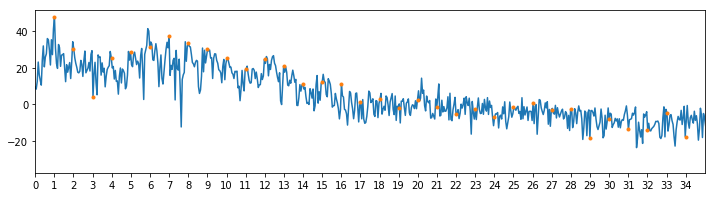

(1600,) (100, 1000) 488.9204 1492.901 0.0


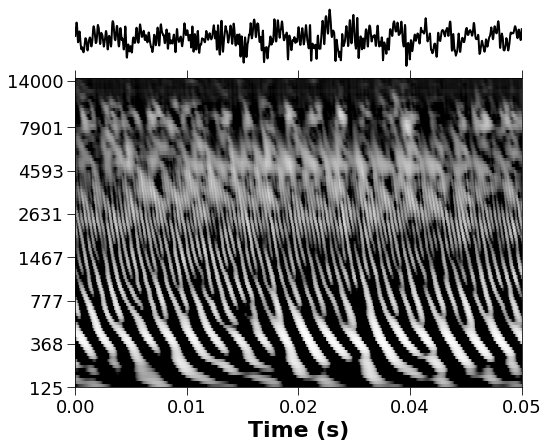

In [17]:
import h5py
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import cm
import IPython.display as ipd

import sys
sys.path.append('assets_datasets/')
from util_stimuli import *

import glob


def make_plot(pin_fs, pin, mr_fs, mr, freq, figsize=(12, 8),
              xfont=22, yfont=22, legfont=18, min_time=None, max_time=None):
    pin = np.squeeze(pin)
    mr = np.squeeze(mr)

    pin_time = np.arange(0, pin.shape[0]) / pin_fs
    mr_time = np.arange(0, mr.shape[1]) / mr_fs
    if (not min_time == None) and (not max_time == None):
        pin_idx = np.squeeze(np.argwhere(np.logical_and(pin_time>=min_time, pin_time<=max_time)))
        mr_idx = np.squeeze(np.argwhere(np.logical_and(mr_time>=min_time, mr_time<=max_time)))
        pin_time = pin_time[pin_idx]
        pin = pin[pin_idx]
        mr_time = mr_time[mr_idx]
        mr = mr[:, mr_idx]

    freq = np.array(freq)
    freq_idx = np.linspace(0, freq.shape[0]-1, 8, dtype=int)
    freq_labels = ['{:.0f}'.format(freq[itr0]) for itr0 in freq_idx]
    time_idx = np.linspace(0, mr_time.shape[0]-1, 5, dtype=int)
    time_labels = ['{:.2f}'.format(mr_time[itr0]) for itr0 in time_idx]

    fig, ax = plt.subplots(nrows=2, ncols=1, figsize=figsize,
                           gridspec_kw={'height_ratios':[1,5], 'hspace':0.05}, sharex=True)
    
    ax[0].plot(pin_time, pin, 'k-', linewidth=2)
    ax[0].set_xlim([pin_time[0], pin_time[-1]])
    ax[0].set_yticks([])
    ax[0].set_yticklabels([])
    #ax[0].set_ylabel('Waveform', fontsize=yfont, fontweight='bold')
    ax[0].get_xaxis().set_visible(False)
    ax[0].get_yaxis().set_visible(False)
    ax[0].spines["top"].set_visible(False)
    ax[0].spines["right"].set_visible(False)
    ax[0].spines["bottom"].set_visible(False)
    ax[0].spines["left"].set_visible(False)


    ax[1].imshow(mr, origin='lower', aspect='auto', extent=[0, mr.shape[1], 0, mr.shape[0]], cmap=cm.gray)
    ax[1].set_yticks(freq_idx)
    ax[1].set_yticklabels(freq_labels, fontsize=legfont)
    ax[1].set_xticks(time_idx)
    ax[1].set_xticklabels(time_labels, fontsize=legfont)
    ax[1].set_xlabel('Time (s)', fontsize=xfont, fontweight='bold')
    ax[1].set_ylabel('Characteristic frequency (Hz)', fontsize=yfont, fontweight='bold')
    ax[1].tick_params(axis='both', labelsize=legfont)
    ax[1].tick_params(direction='out', axis='both', which='major', length=8, right=False, top=True)
    ax[1].tick_params(direction='out', axis='both', which='minor', length=8, right=False, top=True)

#     plt.show()
    
    return fig, ax



# fn_regex = '/om/user/msaddler/data_pitchnet/bernox2005/LowSpec_f0min0080_f0max1000/cf100_species002_spont070/bez2018meanrates*.hdf5'
# fn_regex = '/om/scratch/Wed/msaddler/data_pitchnet/PND_v00/noise_JWSS_snr_neg10pos03/cf100_species002_spont070/bez2018meanrates*.hdf5'
fn_regex = '/om/scratch/Wed/msaddler/data_pitchnet/PND_v01/noise_JWSS_snr_pos10pos30/cf100_species002_spont070/bez2018meanrates*.hdf5'
# fn_regex = '/om/scratch/Wed/msaddler/data_pitchnet/PND_v01/noise_JWSS_snr_neg10pos03/augment_halfbandpass/cf100_species002_spont070/bez2018meanrates*.hdf5'
# fn_regex = '/om/user/msaddler/data_pitchnet/bernox2005/MovingFilter_f0min100_f0max300/cf100_species002_spont070/bez2018meanrates_*.hdf5'
# fn_regex = '/om/user/msaddler/data_pitchnet/bernox2005/MovingFilter_f0min080_f0max640/cf100_species002_spont070/bez2018meanrates_*.hdf5'
fn_regex = '/om/scratch/Fri/msaddler/data_pitchnet/PND_v04/noise_JWSS_snr_neg10pos03/cf100_species002_spont070/bez2018meanrates*.hdf5'
# fn_regex = '/om/user/msaddler/data_pitchnet/bernox2005/HighSpecDense_f0min0080_f0max1000/cf100_species002_spont070/bez2018meanrates*.hdf5'
# fn_regex = '/om/scratch/Sun/msaddler/data_pitchnet/PND_v03/noise_JWSS_snr_neg10pos03/cf100_species002_spont070/bez2018meanrates_*.hdf5'
# fn_regex = '/om/user/msaddler/data_pitchnet/bernox2005/FixedFilter_f0min100_f0max300/cf100_species002_spont070/bez2018meanrates_*.hdf5'
# fn_regex = '/om/user/msaddler/data_pitchnet/mooremoore2003/MooreMoore2003_frequencyShiftedComplexes_f0_080to480Hz_mod00/cf100_species002_spont070/bez2018meanrates*.hdf5'
# fn_regex = '/om/user/msaddler/ANmodel_data_BEZ/*pitch-shift*'
fn_regex = '/om/user/msaddler/data_pitchnet/shackcarl1994/AltPhase_v00_f0min080_f0max320/cf100_species002_spont070/*.hdf5'
# fn_regex = '/om/user/msaddler/data_pitchnet/mooremoore2003/MooreMoore2003_frequencyShiftedComplexes_f0_080to480Hz_UMNm1xBW/cf100_species002_spont070/bez2018meanrates*.hdf5'
fn_regex = '/om/user/msaddler/data_pitchnet/oxenham2004/Oxenham2004_transposedTones_f0_080to320Hz/cf100_species002_spont070/bez2018meanrates_*.hdf5'
# fn_regex = '/om/scratch/Fri/msaddler/data_pitchnet/PND_v01/noise_JWSS_snr_pos10pos30/cf100_species002_spont070/bez2018meanrates*.hdf5'
# fn_regex = '/om/user/msaddler/data_pitchnet/moore1985/Moore1985_MistunedHarmonics_v00/cf100_species002_spont070/bez2018meanrates*.hdf5'
# fn_regex = '/om/scratch/Mon/msaddler/data_pitchnet/PND_v04/noise_JWSS_snr_neg10pos03/cf100_species002_spont070_lowpass1000Hz/bez2018meanrates*.hdf5'
# fn_regex = '/om/scratch/Mon/msaddler/data_pitchnet/PND_v04/noise_JWSS_snr_neg10pos03/cf100_species002_spont070_lowpass1000Hz/bez2018meanrates*.hdf5'
# fn_regex = '/om/scratch/Sun/msaddler/data_pitchnet/PND_v04/noise_JWSS_snr_neg10pos03/cf100_species002_spont070_lowpass0320Hz/bez2018meanrates*.hdf5'
# fn_regex = '/om/scratch/Mon/msaddler/data_pitchnet/PND_v04/noise_JWSS_snr_neg10pos03/augment_halflowpassnoise_v00/cf100_species002_spont070/bez2018meanrates*.hdf5'
# fn_regex = '/om/user/msaddler/data_pitchnet/bernox2005/FixedFilter_f0min100_f0max300/cf100_species002_spont070_lowpass1000Hz/bez2018meanrates*.hdf5'
# fn_regex = '/om/user/msaddler/data_pitchnet/bernox2005/FixedFilter_f0min100_f0max300/cf100_species002_spont070/bez2018meanrates*.hdf5'
# fn_regex = '/om/scratch/Sun/msaddler/data_pitchnet/PND_v04/noise_TLAS_snr_neg10pos03/cf100_species002_spont070/bez2018meanrates*.hdf5'
# fn_regex='/om/scratch/Sun/msaddler/data_pitchnet/PND_v04/noise_TLAS_snr_neg10pos03/cf100_species002_spont070_lowpass1000Hz/bez2018meanrates*.hdf5'
fn_regex = '/om/scratch/Sun/msaddler/data_pitchnet/PND_v04/noise_TLAS_snr_neg10pos03/cf100_species002_spont070_BW10eN1_IHC1000Hz_IHC7order/bez2018meanrates*.hdf5'
fn_regex = '/om/user/msaddler/data_pitchnet/bernox2005/FixedFilter_f0min100_f0max300/cf100_species002_spont070_BW10eN1_IHC5000Hz_IHC7order/bez2018meanrates*.hdf5'
fn_regex = '/om/scratch/Sun/msaddler/data_pitchnet/PND_v04/noise_TLAS_snr_neg10pos03/sr16000_cf100_species002_spont070_BW10eN1_IHC3000Hz_IHC7order/bez2018meanrates*.hdf5'
fn_regex = '/om/user/msaddler/data_pitchnet/bernox2005/FixedFilter_f0min100_f0max300/sr16000_cf100_species002_spont070_BW10eN1_IHC3000Hz_IHC7order/bez2018meanrates*.hdf5'
fn_regex = '/om/user/msaddler/data_pitchnet/bernox2005/FixedFilter_f0min100_f0max300/sr20000_cf100_species002_spont070_BW10eN1_IHC3000Hz_IHC7order/bez2018meanrates*.hdf5'
fn_regex = '/om/scratch/Sat/msaddler/data_pitchnet/PND_v08/noise_TLAS_snr_neg10pos10_filter_signalBPv00/sr20000_cf100_species002_spont070_BW10eN1_IHC3000Hz_IHC7order/bez2018meanrates*.hdf5'
fn_regex = '/om/user/msaddler/data_pitchnet/bernox2005/FixedFilter_f0min100_f0max300/sr20000_cf100_species002_spont070_BW20eN1_IHC3000Hz_IHC7order/bez2018meanrates*.hdf5'
fn_regex = '/om/scratch/Fri/msaddler/data_pitchnet/PND_v08/noise_TLAS_snr_neg10pos10/sr20000_cf100_species002_spont070_BW20eN1_IHC3000Hz_IHC7order/bez2018meanrates*.hdf5'

fn_list = sorted(glob.glob(fn_regex))
fn_idx = np.random.randint(len(fn_list))
# fn_idx = 15 # 9 15 21
fn = fn_list[fn_idx]
# fn = fn_list[10]
f = h5py.File(fn, 'r')
for v in f.values(): print(v)

idx = np.random.randint(0, high=f['meanrates'].shape[0])
# idx = 125
print(fn, fn_idx, idx)

pin_fs = f['signal_fs'][0]
pin = f['signal'][idx]
mr_fs = f['meanrates_fs'][0]
mr = f['meanrates'][idx]
freq = f['cf_list'][0]
# pin_fs = 100000
# pin = f['pin'][idx]
# mr_fs = f['config/meanrates_Fs'][0]
# mr = f['meanrates'][idx]
# freq = f['config/ANmodel_CF_list'][0]

if 'snr' in f:
    print('SNR: {:.2f} dB'.format(f['snr'][idx]))
if 'f0' in f:
    f0 = f['f0'][idx]
    print('F0: {:.2f} Hz'.format(f0))
if 'pin_dBSPL' in f:
    pin_dBSPL = f['pin_dBSPL'][idx]
    print('pin_dBSPL: {:.2f}'.format(pin_dBSPL))
if 'f0_shift' in f:
    f0_shift = f['f0_shift'][idx]
    print('f0_shift: {:.2f}'.format(f0_shift))
if 'phase_mode' in f:
    phase_mode = f['phase_mode'][idx]
    print('phase_mode: {}'.format(phase_mode))
if 'low_harm' in f:
    low_harm = f['low_harm'][idx]
    print('low_harm: {}'.format(low_harm))

f.close()

# fig, ax = make_plot(pin_fs, pin, mr_fs, mr, freq)
ipd.display(ipd.Audio(pin, rate=pin_fs))

MAX_HARM = 35
fr, ps = power_spectrum(pin, pin_fs)
plt.figure(figsize=(12, 3))
plt.plot(fr/f0, ps)
harm_freq_idx = []
for harm_num in range(1, MAX_HARM):
    harm_freq_idx.append(np.argmin(np.abs(fr/f0 - harm_num)))
plt.plot(range(1, MAX_HARM), ps[harm_freq_idx], '.')

plt.xlim([0, MAX_HARM])
plt.xticks(range(MAX_HARM))
plt.show()

print(pin.shape, mr.shape, mr.mean(), mr.max(), mr.min())


fig, ax = make_plot(pin_fs, pin, mr_fs, mr, freq, figsize=(8, 7))
ax[1].set_ylabel(None)
plt.show()
# fig.savefig('assets_psychophysics/figures/archive_2019_10_01_cog_lunch_figures/nervegram_Carney_bernox_lharm9_phase0_141Hz_ANlowpass1000Hz.pdf', bbox_inches='tight')
# fig.savefig('assets_psychophysics/figures/archive_2019_10_01_cog_lunch_figures/nervegram_Carney_bernox_lharm9_phase0_141Hz_ANlowpass1000Hz.png', bbox_inches='tight')



In [11]:
import h5py

# f = h5py.File('/om/user/msaddler/data_pitchnet/bernox2005/FixedFilter_f0min100_f0max300/FixedFilter_f0min100_f0max300.hdf5')
f = h5py.File('/om/user/msaddler/data_pitchnet/oxenham2004/Oxenham2004_transposedTones_f0_080to320Hz/Oxenham2004_transposedTones_f0_080to320Hz.hdf5', 'r')

# signal_key = 'tone_in_noise'
# sr = 32000
# vals_f0 = f['f0'][:]
# vals_lharm = f['low_harm'][:]
# vals_phase = f['phase_mode'][:]

# IDX = np.logical_and(vals_phase == 0, vals_lharm == 9)
# IDX = np.logical_and(IDX, np.logical_and(vals_f0>=141, vals_f0<141.2))
# IDX = np.squeeze(np.argwhere(IDX))
# print(IDX, IDX // 2016, IDX % 2016)

signal_key = 'signal'
sr = 32000
vals_fe = f['f_envelope'][:]
vals_fc = f['f_carrier'][:]
vals_f0 = f['f0'][:]

print(np.unique(vals_fc))

IDX = vals_fc >= 0
IDX = np.logical_and(IDX, np.logical_and(vals_f0>=200, vals_f0<200.01))
IDX = np.squeeze(np.argwhere(IDX))
print(IDX, IDX // 1024, IDX % 1024)

fn_list = glob.glob('/om/user/msaddler/data_pitchnet/oxenham2004/Oxenham2004_transposedTones_f0_080to320Hz/cf100_species002_spont070/*.hdf5')

for itr0, fn in enumerate(sorted(fn_list)):
    
    print(itr0, os.path.basename(fn))
    
print(4061 - 3072)

f.close()

[    0.  4000.  6350. 10080.]
[ 4061 10205 16349 22493] [ 3  9 15 21] [989 989 989 989]
0 bez2018meanrates_000000-001024.hdf5
1 bez2018meanrates_001024-002048.hdf5
2 bez2018meanrates_002048-003072.hdf5
3 bez2018meanrates_003072-004096.hdf5
4 bez2018meanrates_004096-005120.hdf5
5 bez2018meanrates_005120-006144.hdf5
6 bez2018meanrates_006144-007168.hdf5
7 bez2018meanrates_007168-008192.hdf5
8 bez2018meanrates_008192-009216.hdf5
9 bez2018meanrates_009216-010240.hdf5
10 bez2018meanrates_010240-011264.hdf5
11 bez2018meanrates_011264-012288.hdf5
12 bez2018meanrates_012288-013312.hdf5
13 bez2018meanrates_013312-014336.hdf5
14 bez2018meanrates_014336-015360.hdf5
15 bez2018meanrates_015360-016384.hdf5
16 bez2018meanrates_016384-017408.hdf5
17 bez2018meanrates_017408-018432.hdf5
18 bez2018meanrates_018432-019456.hdf5
19 bez2018meanrates_019456-020480.hdf5
20 bez2018meanrates_020480-021504.hdf5
21 bez2018meanrates_021504-022528.hdf5
22 bez2018meanrates_022528-023552.hdf5
23 bez2018meanrates_02355

In [ ]:
list(f['config'].values())

In [ ]:
fn_regex = '/om/scratch/Wed/msaddler/data_pitchnet/PND_v01/noise_JWSS_snr_neg10pos03/augment_halfbandpass/*.hdf5'

fn_list = sorted(glob.glob(fn_regex))
fn = fn_list[np.random.randint(len(fn_list))]

f = h5py.File(fn, 'r')

for v in f.values():
    print(v)
for v in f['stimuli'].values():
    print('stimuli/', v)
for v in f['augmentation'].values():
    print('augmentation/', v)

idx = np.random.randint(0, high=f['f0'].shape[0])
print(fn, idx)

pin_fs = f['sr'][0]
pin = f['stimuli/signal'][idx]

if 'snr' in f: print('SNR: {:.2f} dB'.format(f['snr'][idx]))
if 'f0' in f:
    f0 = f['f0'][idx]
    print('F0: {:.2f} Hz'.format(f0))
if 'stimuli/signal_in_noise_dBSPL' in f:
    dBSPL = f['stimuli/signal_in_noise_dBSPL'][idx]
    print('pin_dBSPL: {:.2f}'.format(dBSPL))

f.close()

fr, ps = power_spectrum(pin, pin_fs)
plt.figure(figsize=(12, 3))
plt.plot(fr/f0, ps)
plt.xlim([0, 20])
plt.xticks(range(20))
plt.show()

ipd.display(ipd.Audio(pin, rate=pin_fs))



In [ ]:
cd assets_datasets/

In [ ]:
import h5py
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

from util_stimuli import *

f=h5py.File('test.hdf5', 'r')

In [ ]:
list(f.values())

idx = np.random.randint(f['f0'].shape[0])


tone = f['tone'][idx]

fr, ps = power_spectrum(tone, f['config_tone/fs'][0])

plt.figure()
plt.plot(fr, ps)
plt.show()

In [ ]:
plt.figure()
plt.hist(f['phase_mode'][:])
plt.show()

In [ ]:
np.exp(np.mean(np.log([70, 7000])))

In [ ]:
list(f.values())

In [ ]:
import h5py
from util_stimuli import *
f = h5py.File('/om/user/msaddler/data_pitchnet/bernox2005/SyntheticTonesBandpass/SyntheticTonesBandpass_v0_noiseJWSS.hdf5', 'r')

list(f.values())

for idx in range(600000):
    if np.any(np.isnan(f['tone'][idx])):
        for key in f.keys():
            if isinstance(f[key], h5py.Dataset):
                if len(f[key].shape) == 1:
                    print(idx, key, f[key][idx])

f.close()

In [ ]:
f['tone'][:,0]

In [ ]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt


f0_vals = np.arange(80, 1e3, 1)

def f0_to_sigmoid_range(f0, f0_min=40, f0_max=2000, log_scale=True):
    if log_scale:
        return np.log(f0/f0_min) / np.log(f0_max/f0_min)
    else:
        return (f0 - f0_min) / (f0_max - f0_min)
    

plt.figure()
plt.plot(f0_vals, f0_to_sigmoid_range(f0_vals))
plt.plot(f0_vals, f0_to_sigmoid_range(f0_vals, log_scale=False))
plt.ylim([0,1])
plt.show()

f0_to_sigmoid_range(100), f0_to_sigmoid_range(1000)

In [ ]:
import h5py
f = h5py.File('/om/user/msaddler/data_pitchnet/SyntheticTonesLowpass/v1/cf050_species002_spont070/bez2018meanrates_000000-006000.hdf5', 'r')
list(f.values())

In [ ]:
plt.figure()
plt.hist(f['f0_lognormal'][:], 200)
plt.show()

plt.figure()
plt.plot(f['f0'][:], f['f0_lognormal'][:], '.')
plt.show()

In [ ]:
np.min(f['f0_lognormal'][:]), np.max(f['f0_lognormal'][:]), np.mean(f['f0_lognormal'][:])

In [ ]:
import h5py
fn = '/om/user/msaddler/data_ibm_hearing_aid/behavioralKellDataset_sr20000_kellBehavioralDataset.h5'
f=h5py.File(fn, 'r')
list(f['stimuli'].values())
snrs = f['stimuli/kell_snr'][:]

In [ ]:
f.close()

In [ ]:
import numpy as np
import h5py
%matplotlib inline
import matplotlib.pyplot as plt
import IPython.display as ipd
import glob

import sys
sys.path.append('assets_datasets/')
sys.path.append('assets_psychophysics/')
from util_stimuli import complex_tone, modified_uniform_masking_noise, power_spectrum
import stimuli_f0_labels
import f0dl_bernox

json_regex = '/om2/user/msaddler/pitchnet/saved_models/PND_v00_JWSS_*/EVAL_bernox2005_LowSpec_bestckpt.json'
fn_list = sorted(glob.glob(json_regex))
model_name_list = []
for json_fn in fn_list:
    model_name = json_fn.replace('/om2/user/msaddler/pitchnet/saved_models/', '')
    model_name = model_name[:model_name.rfind('/')]
    model_name_list.append(model_name)

NCOLS = 3
NROWS = int(np.ceil(len(fn_list) / NCOLS))
fig, ax = plt.subplots(nrows=NROWS, ncols=NCOLS, figsize=(4*NCOLS, 4*NROWS))
ax = ax.flatten()

for idx, fn in enumerate(fn_list):

    if 'regress' in fn:
        f0_label_pred_key = 'f0_lognormal:labels_pred'
        f0_label_true_key = 'f0_lognormal:labels_true'
    else:
        f0_label_pred_key = 'f0_label:labels_pred'
        f0_label_true_key = 'f0_label:labels_true'
    expt_dict = f0dl_bernox.load_f0_expt_dict_from_json(fn, metadata_key_list=['phase_mode', 'low_harm'],
                                                        f0_label_true_key=f0_label_true_key,
                                                        f0_label_pred_key=f0_label_pred_key)
    expt_dict = f0dl_bernox.add_f0_estimates_to_expt_dict(expt_dict,
                                                          f0_label_true_key=f0_label_true_key,
                                                          f0_label_pred_key=f0_label_pred_key)

    f0_true = expt_dict['f0']
    f0_pred = expt_dict['f0_pred']
    
    phase_index = expt_dict['phase_mode'] == 0
    f0_ref = 250.
    max_diff = 0.1
    f0_index = np.logical_and(f0_true >= f0_ref*(1-max_diff), f0_true <= f0_ref*(1+max_diff))
    f0_ref_idx = np.argmin(np.abs(f0_true - f0_ref))
    f0_ref_true = f0_true[f0_ref_idx]
    f0_ref_pred = f0_pred[f0_ref_idx]
    lharm_index = expt_dict['low_harm'] == expt_dict['low_harm'][f0_ref_idx]
    
#     f0_true = f0_true[np.logical_and(phase_index, f0_index, lharm_index)]
#     f0_pred = f0_pred[np.logical_and(phase_index, f0_index, lharm_index)]
    f0_true = f0_true[np.logical_and(phase_index, lharm_index)]
    f0_pred = f0_pred[np.logical_and(phase_index, lharm_index)]
    
    ax[idx].plot(f0_true, f0_pred, 'k.', markersize=0.6)
    ax[idx].plot(f0_ref_true, f0_ref_pred, 'ro', markersize=4)
    ax[idx].set_xlabel('f0_true (Hz)')
    ax[idx].set_ylabel('f0_pred (Hz)')
    ax[idx].set_title(model_name_list[idx])
#     ax[idx].set_yscale('log')
#     ax[idx].set_xscale('log')

for idx in range(len(fn_list), len(ax)): ax[idx].axis('off')
plt.tight_layout()
plt.show()

# fig.savefig('assets_psychophysics/summary_confusion_matrices_2019JUL21_bernox2005_LowSpec_logscale.pdf', bbox_inches='tight')

In [ ]:
expt_dict.keys()

In [ ]:
plt.figure(figsize=(16,4))
plt.plot(expt_dict['f0'], expt_dict['low_harm'], '.-')
plt.show()

In [104]:
import os
import sys
sys.path.append('/code_location/multi_gpu')
import tensorflow as tf
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import glob
import h5py
import IPython.display as ipd

import functions_graph_assembly as fga
import functions_parameter_handling as fph

sys.path.append('assets_datasets')
import util_stimuli

sys.path.append('/om4/group/mcdermott/user/msaddler/pitchnet_dataset/pitchnetDataset/pitchnetDataset')
import augment_dataset


fn_dir = '/om/user/msaddler/data_pitchnet/'

fn = os.path.join(fn_dir, 'bernox2005/FixedFilter_f0min100_f0max300/FixedFilter_f0min100_f0max300.hdf5')
f = h5py.File(fn, 'r')

signal_key = 'tone_in_noise'
sr = 32000
vals_f0 = f['f0'][:]
vals_lharm = f['low_harm'][:]
vals_phase = f['phase_mode'][:]

IDX_list = []
for low_harm in [1]:
    IDX = np.logical_and(vals_phase == 0, vals_lharm == low_harm)
    IDX = np.logical_and(IDX, np.logical_and(vals_f0>=200, vals_f0<200.2))
    IDX = np.squeeze(np.argwhere(IDX))
    print('low_harm={}, IDX={}'.format(low_harm, IDX))
    IDX_list.append(int(IDX))

for cidx, IDX in enumerate(IDX_list):
    print('F0={}, low_harm={}'.format(vals_f0[IDX], vals_lharm[IDX]))

y = f[signal_key][IDX]


ipd.display(ipd.Audio(y, rate=sr))

pin = np.expand_dims(y, axis=0)
pin_fs = sr

print(pin_fs, pin.shape)



low_harm=1, IDX=1496
F0=200.10406377759315, low_harm=1


32000 (1, 4800)


In [105]:
COCH_PARAMS = {
    "N": 100,
    "bandwidth_scale_factor": 0.25,
    "compression": "stable_point3",
    "dc_ramp_cutoff": 30,
    "filter_type": "roex",
    "include_subbands_noise": False,
    "linear_max": 1.0,
    "max_cf": 14000.0,
    "mean_subtract": False,
    "min_cf": 125.0,
    "preprocess_kwargs": {},
    "rFFT": True,
    "rate_level_kwargs": {},
    "rectify_and_lowpass_subbands": True,
    "resample_subbands_kwargs": {
        "beta": 5.0,
        "down": 16,
        "up": 5,
        "window_length": 1001
    },
    "return_subbands_only": True,
    "subbands_noise_mean": 0.0,
    "subbands_noise_stddev": 0.0
}

def freq2erb(freq_hz):
    return 9.265 * np.log(1 + freq_hz / (24.7 * 9.265))

def erb2freq(n_erb):
    return 24.7 * 9.265 * (np.exp(n_erb / 9.265) - 1)

min_erb = freq2erb(COCH_PARAMS['min_cf'])
max_erb = freq2erb(COCH_PARAMS['max_cf'])
cfs_erb = np.linspace(min_erb, max_erb, COCH_PARAMS['N'])
cfs = erb2freq(cfs_erb)
freq = cfs


### BUILD TENSORFLOW GRAPH FROM PLACEHOLDER ###
tf.reset_default_graph()
batch_waveform = tf.placeholder(tf.float32, [None, pin.shape[1]])
batch_subbands, coch_container = fga.build_coch_graph(batch_waveform, signal_rate=pin_fs,
                                                      COCH_PARAMS=COCH_PARAMS)

### START TENSORFLOW SESSION AND INITIALIZE GRAPH ###
init_op = tf.group(tf.global_variables_initializer(), tf.local_variables_initializer())
sess = tf.Session()
sess.run(init_op)


mr = sess.run(batch_subbands, feed_dict={batch_waveform: pin})
mf_fs = 10000
mr_sidx = 500
mr_eidx = 1000
mr = mr[0, :, mr_sidx:mr_eidx, 0]
pin = pin[0, int(mr_sidx * pin_fs/mr_fs):int(mr_eidx * pin_fs/mr_fs)]


Including ramp below 30 Hz to eliminate DC offset in roex filterbank


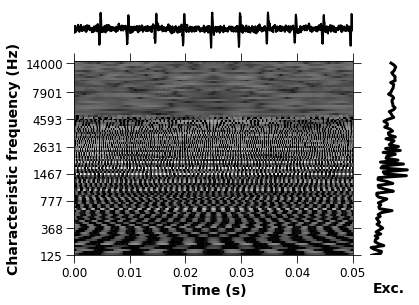

/om2/user/msaddler/pitchnet/assets_psychophysics/figures/archive_2019_10_17_APAN_poster/nervegram_RSB_lowharm1_200HzF0_0pt25xBW.pdf


In [106]:
import h5py
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import cm
import IPython.display as ipd

import sys
sys.path.append('assets_datasets/')
from util_stimuli import *

import glob


def make_plot(pin_fs, pin, mr_fs, mr, freq,
              figsize=(12, 8),
              xfont=22, yfont=22, tickfont=18,
              min_time=None, max_time=None,
              lw_stimulus=2,
              lw_excitation=4):
    pin = np.squeeze(pin)
    mr = np.squeeze(mr)

    pin_time = np.arange(0, pin.shape[0]) / pin_fs
    mr_time = np.arange(0, mr.shape[1]) / mr_fs
    if (not min_time == None) and (not max_time == None):
        pin_idx = np.squeeze(np.argwhere(np.logical_and(pin_time>=min_time, pin_time<=max_time)))
        mr_idx = np.squeeze(np.argwhere(np.logical_and(mr_time>=min_time, mr_time<=max_time)))
        pin_time = pin_time[pin_idx]
        pin = pin[pin_idx]
        mr_time = mr_time[mr_idx]
        mr = mr[:, mr_idx]

    freq = np.array(freq)
    freq_idx = np.linspace(0, freq.shape[0]-1, 8, dtype=int)
    freq_labels = ['{:.0f}'.format(freq[itr0]) for itr0 in freq_idx]
    time_idx = np.linspace(0, mr_time.shape[0]-1, 6, dtype=int)
    time_labels = ['{:.2f}'.format(mr_time[itr0]) for itr0 in time_idx]

    fig, ax = plt.subplots(nrows=2, ncols=2, figsize=figsize,
                           gridspec_kw={'height_ratios':[1,5], 'width_ratios':[7,1], 'hspace':0.1, 'wspace':0.1},
                           sharex=False)
    
    ax[0,0].plot(pin_time, pin, 'k-', lw=lw_stimulus)
    ax[0,0].set_xlim([pin_time[0], pin_time[-1]])
    ax[0,0].set_yticks([])
    ax[0,0].set_yticklabels([])
    ax[0,0].get_xaxis().set_visible(False)
    ax[0,0].get_yaxis().set_visible(False)
    ax[0,0].spines["top"].set_visible(False)
    ax[0,0].spines["right"].set_visible(False)
    ax[0,0].spines["bottom"].set_visible(False)
    ax[0,0].spines["left"].set_visible(False)

    ax[1,0].imshow(mr, origin='lower', aspect='auto', extent=[0, mr.shape[1], 0, mr.shape[0]], cmap=cm.gray)
    ax[1,0].set_yticks(freq_idx)
    ax[1,0].set_yticklabels(freq_labels, fontsize=tickfont)
    ax[1,0].set_xticks(time_idx)
    ax[1,0].set_xticklabels(time_labels, fontsize=tickfont)
    ax[1,0].set_xlabel('Time (s)', fontsize=xfont, fontweight='bold')
    ax[1,0].set_ylabel('Characteristic frequency (Hz)', fontsize=yfont, fontweight='bold')
    ax[1,0].tick_params(axis='both', labelsize=tickfont)
    ax[1,0].tick_params(direction='out', axis='both', which='major', length=8, right=True, top=True)
    ax[1,0].tick_params(direction='out', axis='both', which='minor', length=8, right=True, top=True)

    ax[0,1].axis('off')
    
    ax[1,1].plot(np.sum(mr, axis=1), np.arange(0, mr.shape[0]), 'k', lw=lw_excitation)
    ax[1,1].set_xticks([])
    ax[1,1].set_yticks([])
    ax[1,1].spines["top"].set_visible(False)
    ax[1,1].spines["bottom"].set_visible(False)
    ax[1,1].spines["right"].set_visible(False)
    ax[1,1].spines["left"].set_visible(False)
    ax[1,1].set_ylim([0, mr.shape[0]])
    ax[1,1].set_xlabel('Exc.', fontsize=xfont, fontweight='bold', labelpad=tickfont+xfont)
    
    plt.show()
    
    return fig, ax



fig, ax = make_plot(pin_fs, pin, mr_fs, mr, freq, figsize=(6, 4.5),
                    xfont=14, yfont=14, tickfont=12,
                    min_time=None, max_time=None,
                    lw_stimulus=2, lw_excitation=3)

# nervegram_fn = '/om2/user/msaddler/pitchnet/assets_psychophysics/figures/archive_2019_10_17_APAN_poster/nervegram_RSB_lowharm1_200HzF0_0pt25xBW.pdf'
# print(nervegram_fn)
# fig.savefig(nervegram_fn, bbox_inches='tight')


<HDF5 dataset "cf_list": shape (1, 100), type "<f4">
<HDF5 group "/config_bez2018model" (11 members)>
<HDF5 dataset "f0": shape (1024,), type "<f4">
<HDF5 dataset "f0_label": shape (1024,), type "<i8">
<HDF5 dataset "f0_log2": shape (1024,), type "<f4">
<HDF5 dataset "f0_lognormal": shape (1024,), type "<f4">
<HDF5 dataset "f_carrier": shape (1024,), type "<f4">
<HDF5 dataset "f_envelope": shape (1024,), type "<f4">
<HDF5 dataset "meanrates": shape (1024, 100, 500), type "<f4">
<HDF5 dataset "meanrates_fs": shape (1,), type "<f8">
<HDF5 dataset "pin_dBSPL": shape (1024,), type "<f4">
<HDF5 dataset "pin_fs": shape (1,), type "<f8">
<HDF5 dataset "signal": shape (1024, 1600), type "<f4">
<HDF5 dataset "signal_fs": shape (1,), type "<i8">
<HDF5 dataset "spont_list": shape (1,), type "<f4">
/om/user/msaddler/data_pitchnet/oxenham2004/Oxenham2004_transposedTones_f0_080to320Hz/cf100_species002_spont070/bez2018meanrates_009216-010240.hdf5 9 989
200.00166


(1600,) (100, 500) 202.63702 1259.0386 0.0


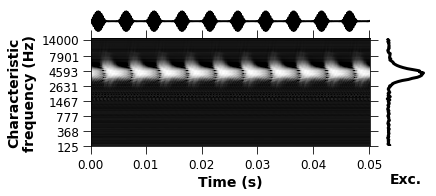

/om2/user/msaddler/pitchnet/assets_psychophysics/figures/archive_2019_10_17_APAN_poster/nervegram_transposedtone_200HzF0_TT.pdf


In [6]:
import h5py
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import cm
import IPython.display as ipd

import sys
sys.path.append('assets_datasets/')
from util_stimuli import *

import glob

def make_plot(pin_fs, pin, mr_fs, mr, freq,
              figsize=(12, 8),
              xfont=22, yfont=22, tickfont=18,
              min_time=None, max_time=None,
              lw_stimulus=2,
              lw_excitation=4):
    pin = np.squeeze(pin)
    mr = np.squeeze(mr)

    pin_time = np.arange(0, pin.shape[0]) / pin_fs
    mr_time = np.arange(0, mr.shape[1]) / mr_fs
    if (not min_time == None) and (not max_time == None):
        pin_idx = np.squeeze(np.argwhere(np.logical_and(pin_time>=min_time, pin_time<=max_time)))
        mr_idx = np.squeeze(np.argwhere(np.logical_and(mr_time>=min_time, mr_time<=max_time)))
        pin_time = pin_time[pin_idx]
        pin = pin[pin_idx]
        mr_time = mr_time[mr_idx]
        mr = mr[:, mr_idx]

    freq = np.array(freq)
    freq_idx = np.linspace(0, freq.shape[0]-1, 8, dtype=int)
    freq_labels = ['{:.0f}'.format(freq[itr0]) for itr0 in freq_idx]
    time_idx = np.linspace(0, mr_time.shape[0]-1, 6, dtype=int)
    time_labels = ['{:.2f}'.format(mr_time[itr0]) for itr0 in time_idx]

    fig, ax = plt.subplots(nrows=2, ncols=2, figsize=figsize,
                           gridspec_kw={'height_ratios':[1,5], 'width_ratios':[7,1], 'hspace':0.1, 'wspace':0.1},
                           sharex=False)
    
    ax[0,0].plot(pin_time, pin, 'k-', lw=lw_stimulus)
    ax[0,0].set_xlim([pin_time[0], pin_time[-1]])
    ax[0,0].set_yticks([])
    ax[0,0].set_yticklabels([])
    ax[0,0].get_xaxis().set_visible(False)
    ax[0,0].get_yaxis().set_visible(False)
    ax[0,0].spines["top"].set_visible(False)
    ax[0,0].spines["right"].set_visible(False)
    ax[0,0].spines["bottom"].set_visible(False)
    ax[0,0].spines["left"].set_visible(False)

    ax[1,0].imshow(mr, origin='lower', aspect='auto', extent=[0, mr.shape[1], 0, mr.shape[0]], cmap=cm.gray)
    ax[1,0].set_yticks(freq_idx)
    ax[1,0].set_yticklabels(freq_labels, fontsize=tickfont)
    ax[1,0].set_xticks(time_idx)
    ax[1,0].set_xticklabels(time_labels, fontsize=tickfont)
    ax[1,0].set_xlabel('Time (s)', fontsize=xfont, fontweight='bold')
    ax[1,0].set_ylabel('Characteristic\nfrequency (Hz)', fontsize=yfont, fontweight='bold')
    ax[1,0].tick_params(axis='both', labelsize=tickfont)
    ax[1,0].tick_params(direction='out', axis='both', which='major', length=8, right=True, top=True)
    ax[1,0].tick_params(direction='out', axis='both', which='minor', length=8, right=True, top=True)

    ax[0,1].axis('off')
    
    ax[1,1].plot(np.sum(mr, axis=1), np.arange(0, mr.shape[0]), 'k', lw=lw_excitation)
    ax[1,1].set_xticks([])
    ax[1,1].set_yticks([])
    ax[1,1].spines["top"].set_visible(False)
    ax[1,1].spines["bottom"].set_visible(False)
    ax[1,1].spines["right"].set_visible(False)
    ax[1,1].spines["left"].set_visible(False)
    ax[1,1].set_ylim([0, mr.shape[0]])
    ax[1,1].set_xlabel('Exc.', fontsize=xfont, fontweight='bold', labelpad=tickfont+xfont)
    
    plt.show()
    
    return fig, ax




fn_regex = '/om/user/msaddler/data_pitchnet/oxenham2004/Oxenham2004_transposedTones_f0_080to320Hz/cf100_species002_spont070/bez2018meanrates_*.hdf5'

fn_list = sorted(glob.glob(fn_regex))
fn_idx = np.random.randint(len(fn_list))
fn_idx = 9 # 3 9 15 21
fn = fn_list[fn_idx]
# fn = fn_list[10]
f = h5py.File(fn, 'r')
for v in f.values(): print(v)

idx = np.random.randint(0, high=f['meanrates'].shape[0])
idx = 989
print(fn, fn_idx, idx)

pin_fs = f['signal_fs'][0]
pin = f['signal'][idx]
mr_fs = f['meanrates_fs'][0]
mr = f['meanrates'][idx]
freq = f['cf_list'][0]

print(f['f0'][idx])
f.close()

# fig, ax = make_plot(pin_fs, pin, mr_fs, mr, freq)
ipd.display(ipd.Audio(pin, rate=pin_fs))


print(pin.shape, mr.shape, mr.mean(), mr.max(), mr.min())



fig, ax = make_plot(pin_fs, pin, mr_fs, mr, freq, figsize=(6, 2.5),
                    xfont=14, yfont=14, tickfont=12,
                    min_time=None, max_time=None,
                    lw_stimulus=2, lw_excitation=3)

# nervegram_fn = '/om2/user/msaddler/pitchnet/assets_psychophysics/figures/archive_2019_10_17_APAN_poster/nervegram_transposedtone_200HzF0_TT.pdf'
# print(nervegram_fn)
# fig.savefig(nervegram_fn, bbox_inches='tight')

In [1]:
brain_dict = [{"args": {"filters": 16, "activation": null, "dilation_rate": [1, 1], "name": "conv_0", "padding": "VALID_TIME", "kernel_size": [1, 48], "strides": [1, 1]}, "layer_type": "tf.layers.conv2d"}, {"args": {"name": "relu_0"}, "layer_type": "tf.nn.relu"}, {"args": {"pool_size": [1, 16], "sqrt_window": false, "name": "pool_0", "padding": "VALID_TIME", "normalize": true, "strides": [1, 4]}, "layer_type": "hpool"}, {"args": {"name": "batch_norm_0"}, "layer_type": "tf.layers.batch_normalization"}, {"args": {"filters": 32, "activation": null, "dilation_rate": [1, 1], "name": "conv_1", "padding": "VALID_TIME", "kernel_size": [5, 12], "strides": [1, 1]}, "layer_type": "tf.layers.conv2d"}, {"args": {"name": "relu_1"}, "layer_type": "tf.nn.relu"}, {"args": {"pool_size": [1, 8], "sqrt_window": false, "name": "pool_1", "padding": "VALID_TIME", "normalize": true, "strides": [1, 2]}, "layer_type": "hpool"}, {"args": {"name": "batch_norm_1"}, "layer_type": "tf.layers.batch_normalization"}, {"args": {"filters": 256, "activation": null, "dilation_rate": [1, 1], "name": "conv_2", "padding": "VALID_TIME", "kernel_size": [1, 12], "strides": [1, 1]}, "layer_type": "tf.layers.conv2d"}, {"args": {"name": "relu_2"}, "layer_type": "tf.nn.relu"}, {"args": {"pool_size": [1, 1], "sqrt_window": false, "name": "pool_2", "padding": "VALID_TIME", "normalize": true, "strides": [1, 1]}, "layer_type": "hpool"}, {"args": {"name": "batch_norm_2"}, "layer_type": "tf.layers.batch_normalization"}, {"args": {"filters": 128, "activation": null, "dilation_rate": [1, 1], "name": "conv_3", "padding": "VALID_TIME", "kernel_size": [2, 2], "strides": [1, 1]}, "layer_type": "tf.layers.conv2d"}, {"args": {"name": "relu_3"}, "layer_type": "tf.nn.relu"}, {"args": {"pool_size": [1, 8], "sqrt_window": false, "name": "pool_3", "padding": "VALID_TIME", "normalize": true, "strides": [1, 2]}, "layer_type": "hpool"}, {"args": {"name": "batch_norm_3"}, "layer_type": "tf.layers.batch_normalization"}, {"args": {"filters": 256, "activation": null, "dilation_rate": [1, 1], "name": "conv_4", "padding": "VALID_TIME", "kernel_size": [3, 2], "strides": [1, 1]}, "layer_type": "tf.layers.conv2d"}, {"args": {"name": "relu_4"}, "layer_type": "tf.nn.relu"}, {"args": {"pool_size": [1, 8], "sqrt_window": false, "name": "pool_4", "padding": "VALID_TIME", "normalize": true, "strides": [1, 2]}, "layer_type": "hpool"}, {"args": {"name": "batch_norm_4"}, "layer_type": "tf.layers.batch_normalization"}, {"args": {"filters": 512, "activation": null, "dilation_rate": [1, 1], "name": "conv_5", "padding": "VALID_TIME", "kernel_size": [3, 1], "strides": [1, 1]}, "layer_type": "tf.layers.conv2d"}, {"args": {"name": "relu_5"}, "layer_type": "tf.nn.relu"}, {"args": {"pool_size": [1, 1], "sqrt_window": false, "name": "pool_5", "padding": "VALID_TIME", "normalize": true, "strides": [1, 1]}, "layer_type": "hpool"}, {"args": {"name": "batch_norm_5"}, "layer_type": "tf.layers.batch_normalization"}, {"args": {"name": "flatten_end_conv"}, "layer_type": "tf.layers.flatten"}, {"args": {"units": 256, "name": "fc_intermediate", "activation": null}, "layer_type": "tf.layers.dense"}, {"args": {"name": "relu_fc_intermediate"}, "layer_type": "tf.nn.relu"}, {"args": {"name": "batch_norm_fc_intermediate"}, "layer_type": "tf.layers.batch_normalization"}, {"args": {"rate": 0.5, "name": "dropout"}, "layer_type": "tf.layers.dropout"}, {"args": {"name": "fc_top", "activation": null}, "layer_type": "fc_top_classification"}]
for x in brain_dict:
    print(x)

NameError: name 'null' is not defined

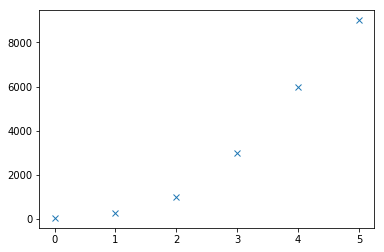

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure()

plt.plot([50, 250, 1000, 3000, 6000, 9000], 'x')
plt.show()